In [2]:
#Sales & Discounts Dataset Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading dataset
df=pd.read_csv("sales_data_with_discounts.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
#Identifying numerical and categorical columns
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols=df.select_dtypes(exclude=[np.number]).columns.tolist()

In [6]:
num_cols

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [7]:
cat_cols

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [8]:
# Descriptive Analytics
print("Descriptive Statistics for Numerical Columns:")

for col in num_cols:
    mean_val=df[col].mean()
    median_val=df[col].median()
    mode_val=df[col].mode()[0]
    std_val=df[col].std()

    print(f"{col}")
    print(f"  Mean   : {mean_val}")
    print(f"  Median : {median_val}")
    print(f"  Mode   : {mode_val}")
    print(f"  Std Dev: {std_val}")
    print("--------------------------------------")

Descriptive Statistics for Numerical Columns:
Volume
  Mean   : 5.066666666666666
  Median : 4.0
  Mode   : 3
  Std Dev: 4.231602391213923
--------------------------------------
Avg Price
  Mean   : 10453.433333333332
  Median : 1450.0
  Mode   : 400
  Std Dev: 18079.90483993647
--------------------------------------
Total Sales Value
  Mean   : 33812.83555555555
  Median : 5700.0
  Mode   : 24300
  Std Dev: 50535.07417255325
--------------------------------------
Discount Rate (%)
  Mean   : 15.155241895330914
  Median : 16.57776564929597
  Mode   : 5.007822189204133
  Std Dev: 4.22060215332551
--------------------------------------
Discount Amount
  Mean   : 3346.499424342415
  Median : 988.9337332382784
  Mode   : 69.17794228822787
  Std Dev: 4509.902963353998
--------------------------------------
Net Sales Value
  Mean   : 30466.336131270138
  Median : 4677.788059301853
  Mode   : 326.97480055470817
  Std Dev: 46358.65662406695
--------------------------------------


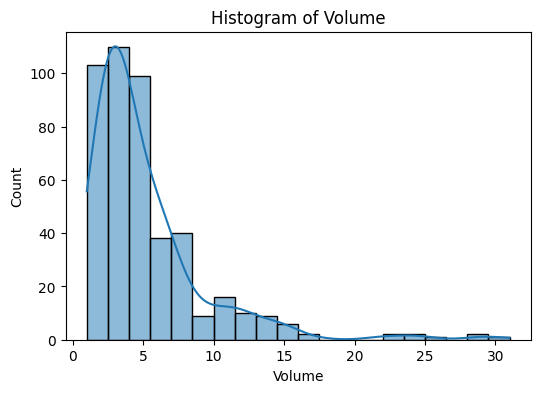

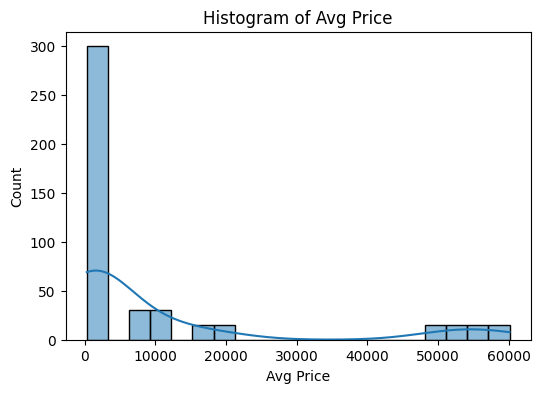

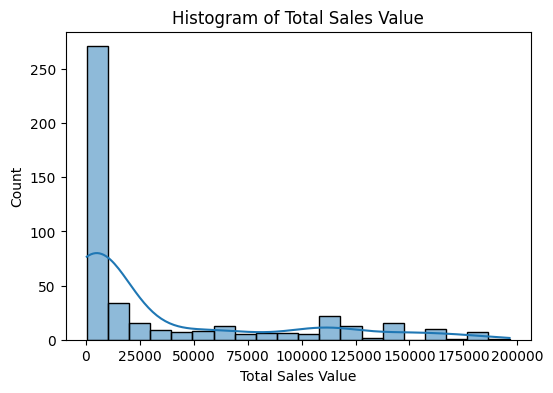

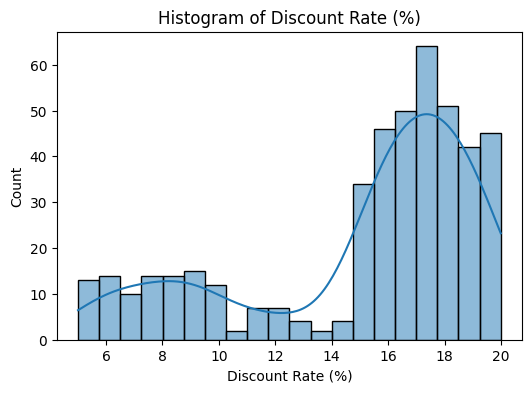

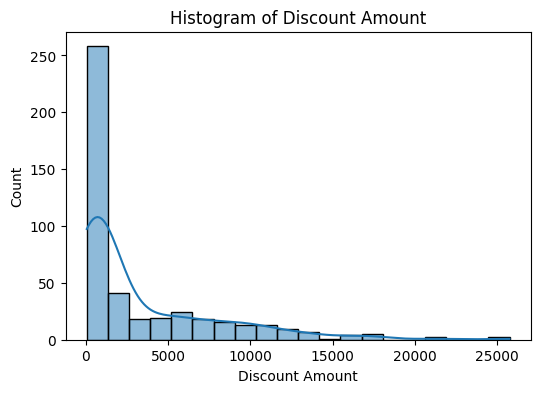

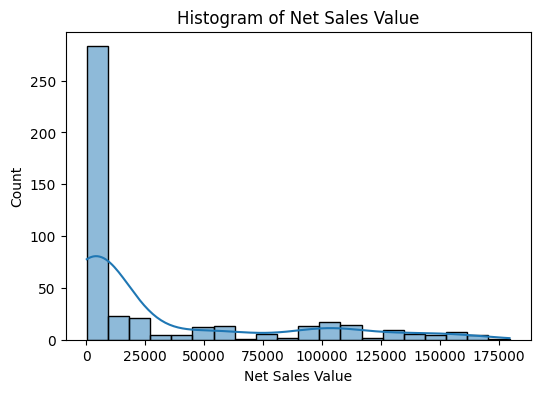

In [9]:
#Data Visualization
#Histograms
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],bins=20,kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

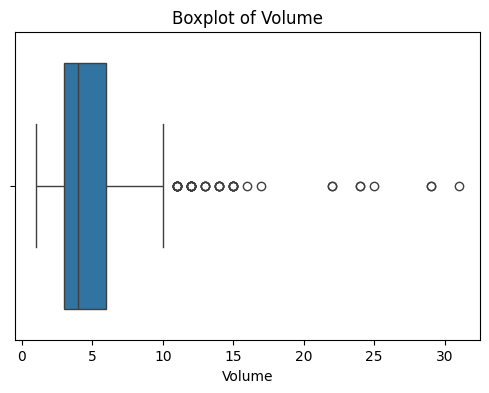

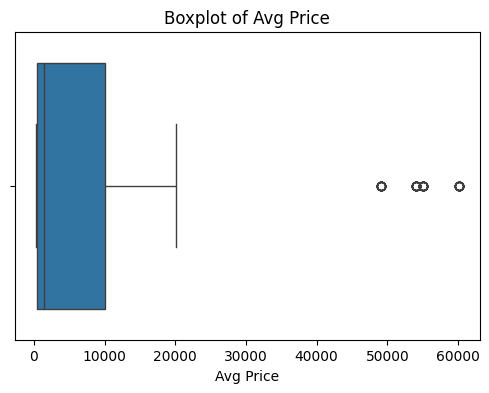

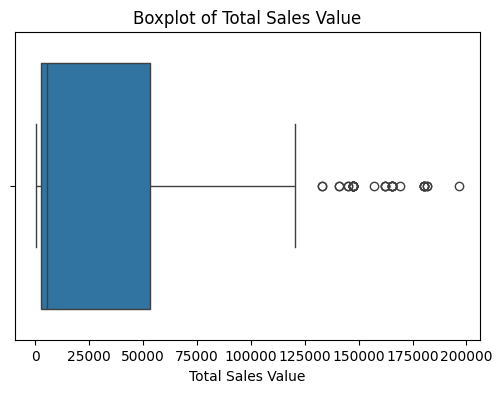

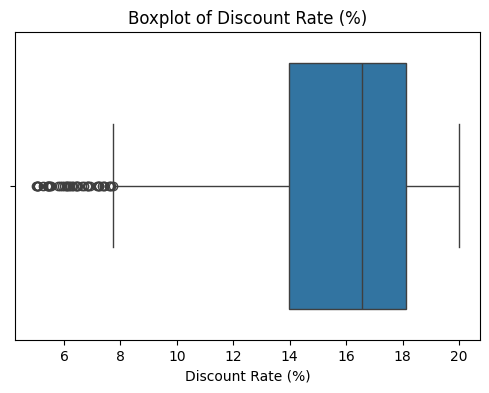

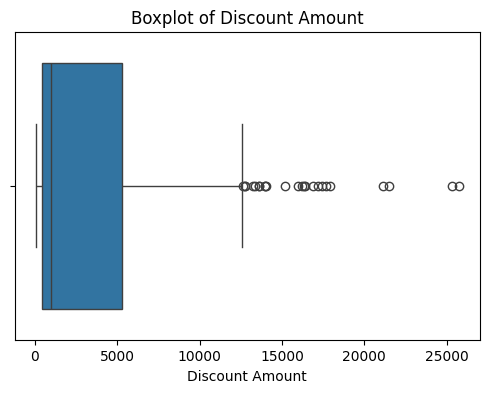

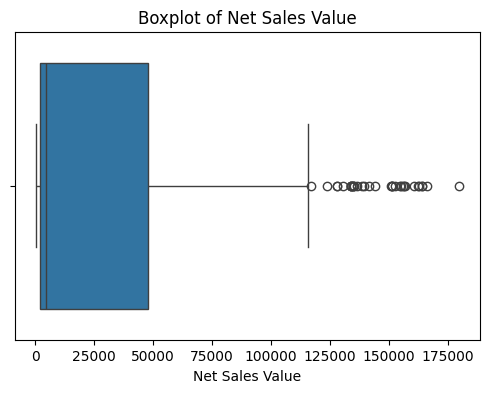

In [10]:
#Boxplots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

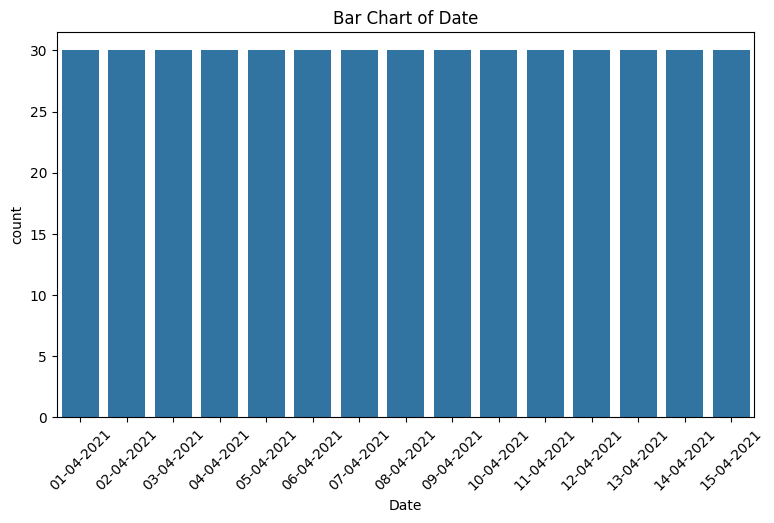

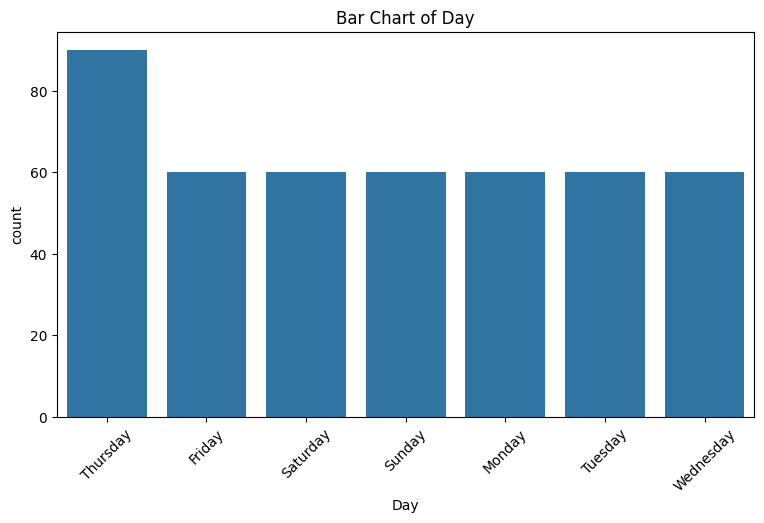

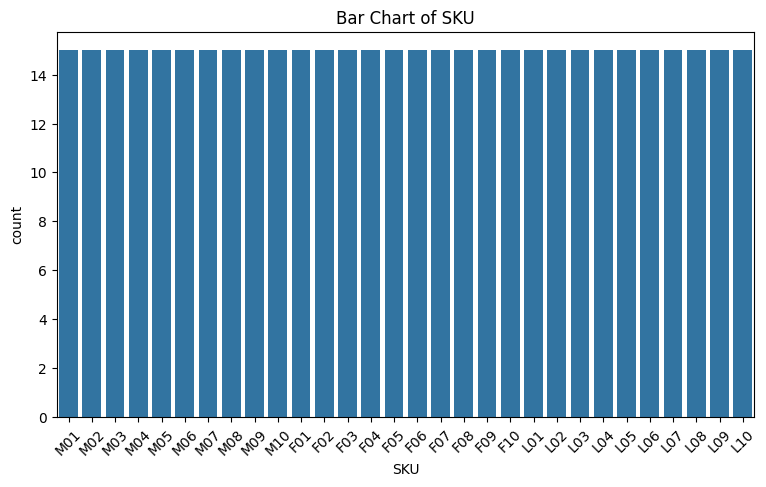

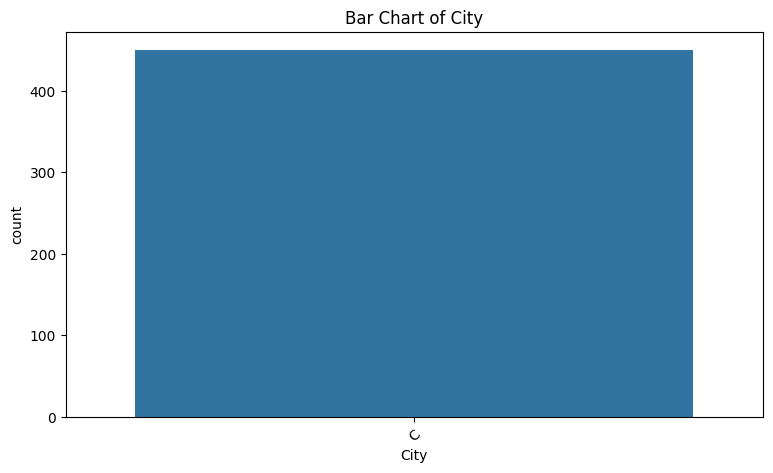

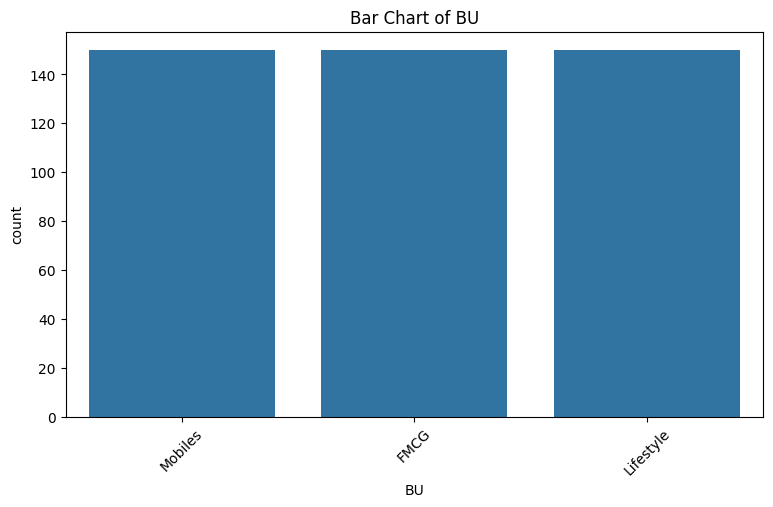

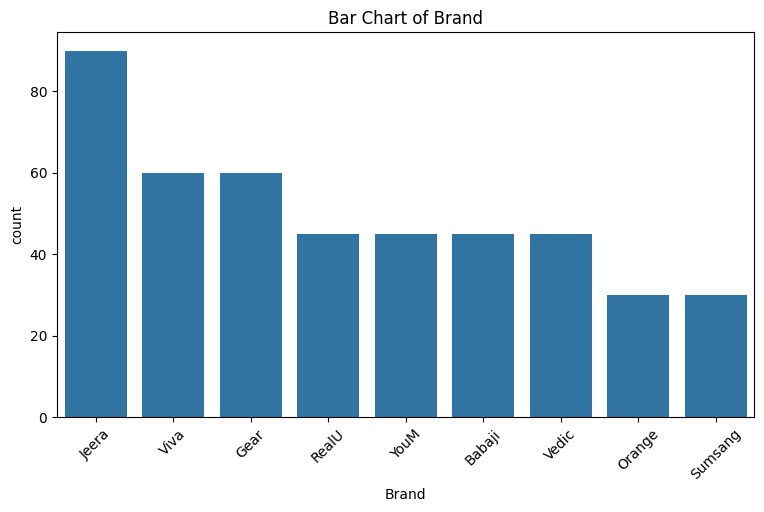

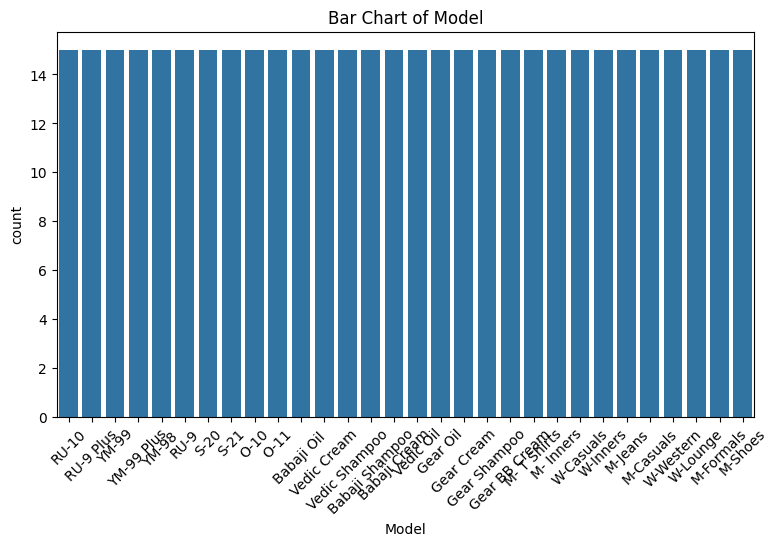

In [11]:
#Bar Charts for categorical columns
for col in cat_cols:
    plt.figure(figsize=(9,5))
    sns.countplot(x=df[col],order=df[col].value_counts().index)
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=45)
    plt.show()

Standardization  
* It is the process of transforming numerical data so that it has a mean of 0 and a standard deviation of 1.
* It makes features that are on different scales (like salary in lakhs vs. age in years) comparable.
* Standardization helps ensure that no variable dominates just because of its larger scale and is especially important for machine learning algorithms that are sensitive to feature magnitudes (like KNN, regression, clustering, etc.).

In [12]:
#Standardization (Z-score Normalization)
standardized_df=df.copy()
for col in num_cols:
    mu,sigma=df[col].mean(),df[col].std()
    standardized_df[col]=(df[col] - mu) / sigma

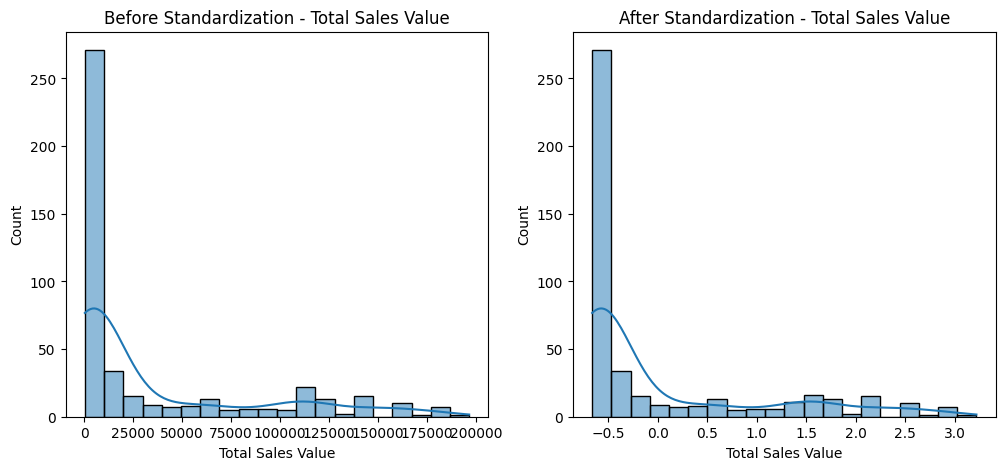

In [13]:
#Example before & after visualization for one variable
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Total Sales Value'],bins=20,kde=True)
plt.title("Before Standardization - Total Sales Value")

plt.subplot(1,2,2)
sns.histplot(standardized_df['Total Sales Value'],bins=20,kde=True)
plt.title("After Standardization - Total Sales Value")
plt.show()

ONE HOT ENCODING  
* Categorical data needs to be converted into dummy variables because most machine learning algorithms work with numerical values, not text or labels. 
* Dummy variables (via one-hot encoding) turn each category into a separate column with 0s and 1s, so the model can understand and use the information correctly without assuming any order or ranking among categories.

In [ ]:
#One-Hot Encoding
encoded_df=pd.get_dummies(df,columns=cat_cols,drop_first=True)
print("Transformed Dataset (after One-Hot Encoding):")
print(encoded_df.head())

Transformed Dataset (after One-Hot Encoding):
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cre

In [15]:
#Conclusion (print summary)
print("Summary:")
print("- Numerical columns analyzed with mean, median, mode, std")
print("- Histograms & Boxplots show skewness and outliers")
print("- Bar charts reveal uneven distribution in categories")
print("- Standardization applied (z-score normalization)")
print("- One-hot encoding expanded dataset to",encoded_df.shape[1],"columns")

Summary:
- Numerical columns analyzed with mean, median, mode, std
- Histograms & Boxplots show skewness and outliers
- Bar charts reveal uneven distribution in categories
- Standardization applied (z-score normalization)
- One-hot encoding expanded dataset to 94 columns


#### Key Findings from Descriptive Analytics & Visualizations

Numerical Columns:
* Volume, Total Sales Value, and Net Sales Value are right-skewed → most sales are small/medium, but a few very high values act as outliers.  
* Discount Rate (%) has a wider spread, meaning discounts vary significantly across products.   
* High standard deviations in sales values show strong variability between different products/transactions.  

Histograms & Boxplots:  
* Outliers exist in Volume, Discount Amount, and Sales Values.  
* These extreme values may represent bulk purchases or special offers.  
* Boxplots highlight wide interquartile ranges, especially in pricing-related fields, confirming uneven distributions.  

Categorical Columns (Bar Charts):  
* Brand & Model: Sales are concentrated in a few brands/models, indicating popularity bias.  
* City: Some cities dominate sales, suggesting uneven market presence.  
* Day: If analyzed, could reveal sales peaks (e.g., weekends, promotions).  

Reflection on Preprocessing Importance

Standardization (Z-score Normalization):  
* Ensures all numerical features are on a comparable scale (mean=0, std=1).  
* Prevents models from being biased towards features with large numeric ranges (e.g., Total Sales Value vs Discount Rate).  
* Essential for distance-based algorithms (KNN, clustering) and optimization in gradient-based models.  

One-Hot Encoding:  
* Converts categorical variables (Brand, City, Model) into machine-readable binary features.  
* Avoids treating categorical labels as ordinal numbers (which could mislead models).  
* Expands the feature space → improves interpretability and lets models capture category-specific effects.  

Final Takeaway:  
* The dataset has skewed sales distributions, significant outliers, and uneven categorical distributions.  
* Preprocessing with standardization and one-hot encoding makes the data cleaner, unbiased, and ready for robust machine learning models.  